# Avocado case study

#### Problem statement

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.`

#### Some relevant columns in the dataset:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
#Load the dataset
df=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/EvaluationProjects/avocado.csv")

In [3]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
# find shape of the dataset

df.shape

(18249, 14)

In [5]:
# drop unused column

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# defining the columns of the dataset

df_cols=df.columns

In [7]:
# check for null values if any

df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
# check for datatypes of individual features

df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [9]:
# check the shape of the dataset

df.shape

(18249, 13)

In [10]:
# check the statistical parameters

df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

In [11]:
# rename the columns to for better understanding

df.rename(columns={'4046':'PLU 4046 sold','4225':'PLU 4225 sold','4770':'PLU 4770 sold'},inplace=True)

In [12]:
df.head()

Date  AveragePrice  Total Volume  PLU 4046 sold  PLU 4225 sold  \
0  2015-12-27          1.33      64236.62        1036.74       54454.85   
1  2015-12-20          1.35      54876.98         674.28       44638.81   
2  2015-12-13          0.93     118220.22         794.70      109149.67   
3  2015-12-06          1.08      78992.15        1132.00       71976.41   
4  2015-11-29          1.28      51039.60         941.48       43838.39   

   PLU 4770 sold  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0          48.16     8696.87     8603.62       93.25          0.0   
1          58.33     9505.56     9408.07       97.49          0.0   
2         130.50     8145.35     8042.21      103.14          0.0   
3          72.58     5811.16     5677.40      133.76          0.0   
4          75.78     6183.95     5986.26      197.69          0.0   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  2015  Albany  
2  conventional  2015  Albany  
3  conventional  2015  Albany  
4  conventional  2015  Albany

In [13]:
# check for unique values of individual features

df.nunique()

Date               169
AveragePrice       259
Total Volume     18237
PLU 4046 sold    17702
PLU 4225 sold    18103
PLU 4770 sold    12071
Total Bags       18097
Small Bags       17321
Large Bags       15082
XLarge Bags       5588
type                 2
year                 4
region              54
dtype: int64

In [14]:
# check for any duplicate values

df.duplicated().any()

False

In [15]:
# check for value_counts of type

df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [16]:
# check for value_counts of region

df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

#### some insights
- There are 18249 entries and 14 columns, one column is an index, so we need to drop it.
- No missing or duplicated values and errors (at the first glance), all unique values are distinct
- There are some columns, for which datatype need to be changed.
At the next step we'll find and treat outliers, rename column names and change datatypes.

In [17]:
# grouping the different type of features
for i in df.columns:
    if i == 'Date':
        df[i]=df[i].astype('datetime64[ns]')
    elif df[i].dtype == 'object':
        df[i] = df[i].astype('category')
numeric_columns = ['AveragePrice', 'Total Volume',
               'PLU 4046 sold', 'PLU 4225 sold', 'PLU 4770 sold',
               'Total Bags', 'Small Bags',
               'Large Bags', 'XLarge Bags']
categorical_columns = ['region','type']
date_columns =['Date','year']
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           18249 non-null  datetime64[ns]
 1   AveragePrice   18249 non-null  float64       
 2   Total Volume   18249 non-null  float64       
 3   PLU 4046 sold  18249 non-null  float64       
 4   PLU 4225 sold  18249 non-null  float64       
 5   PLU 4770 sold  18249 non-null  float64       
 6   Total Bags     18249 non-null  float64       
 7   Small Bags     18249 non-null  float64       
 8   Large Bags     18249 non-null  float64       
 9   XLarge Bags    18249 non-null  float64       
 10  type           18249 non-null  category      
 11  year           18249 non-null  int64         
 12  region         18249 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(9), int64(1)
memory usage: 1.6 MB


None

In [18]:
# Adding one more column named month and classifying it to different weather condition

df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month

conditions = [
            (df['month'].between(1,2)),  #inclusive=True
            (df['month'].between(3,5)),
           (df['month'].between(6,8)),
           (df['month'].between(9,11)),
            (df['month'].between(12,12))
             ] 

values = [3,1,0,2,3]
# summer = 0, spring = 1 , rainfall = 2, winter = 3
df['seasons'] = np.select(conditions, values)

In [19]:
# find the count of the seasons

df['seasons'].value_counts()

3    5075
1    4752
2    4212
0    4210
Name: seasons, dtype: int64

#### Checking for skewness

### Univariate Analysis

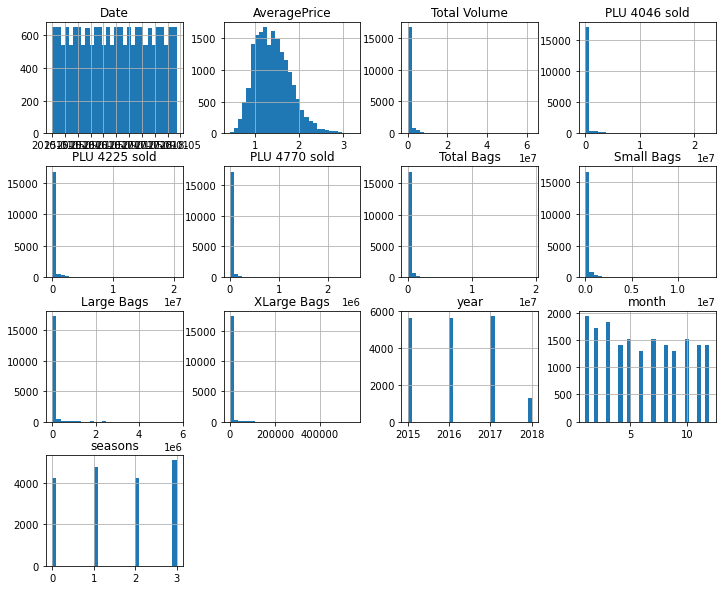

In [20]:
# plotting the histplots to check the skewness

df.hist(grid=True,
       figsize=(12, 10),
       bins=30)
plt.show()

###### All other columns except seasons,month,year,Date & AveragePrice are right skewed

In [21]:
# check for value of skewness in the dataset

df.skew()

<ipython-input-21-15b04214cec4>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


AveragePrice      0.580303
Total Volume      9.007687
PLU 4046 sold     8.648220
PLU 4225 sold     8.942466
PLU 4770 sold    10.159396
Total Bags        9.756072
Small Bags        9.540660
Large Bags        9.796455
XLarge Bags      13.139751
year              0.215339
month             0.106617
seasons          -0.040431
dtype: float64

In [22]:
# plot the boxplots according to the price in different regions

import plotly.express as px
fig = px.box(df, x='region', y='AveragePrice')
fig.show()


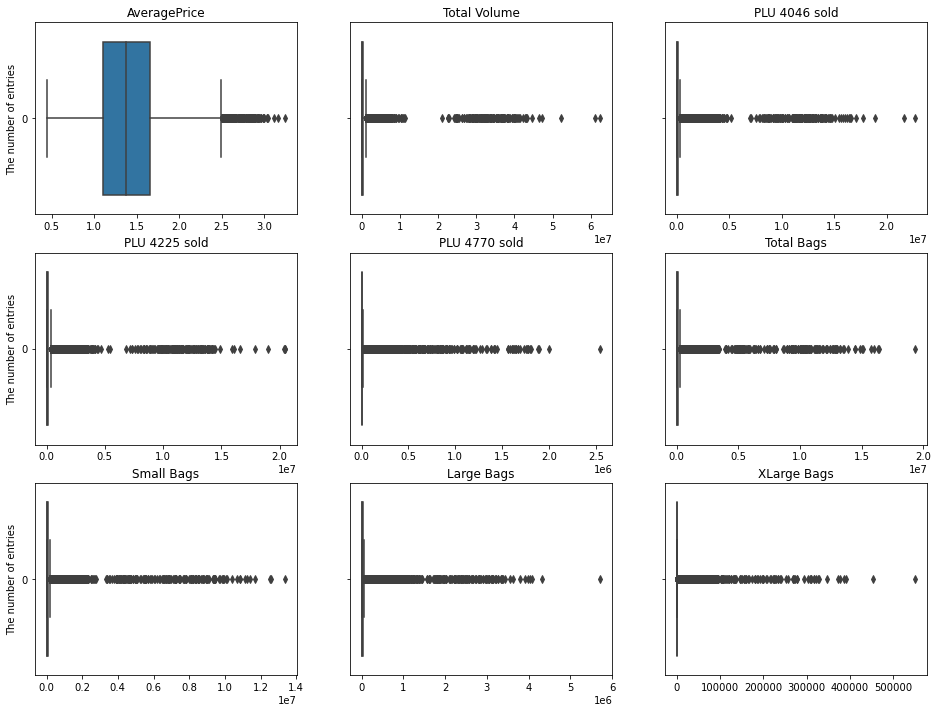

In [23]:
# check for outliers

def boxplots_custom(dataset, columns_list, rows, cols, subtitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,12))
#     fig.subtitle(subtitle,y=0.63, size=14)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=numeric_columns, rows=3, cols=3, subtitle='Boxplots before deleting outliers')

###### we have Outliers to be treated to remove in many columns so we will work on it later

In [24]:
# deleting outliers
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df_new = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |(df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df_new.shape)

Here we will get IQR for each column
 AveragePrice          0.56
Total Volume     422123.71
PLU 4046 sold    110166.13
PLU 4225 sold    147198.08
PLU 4770 sold      6243.42
Total Bags       105694.73
Small Bags        80488.25
Large Bags        21901.78
XLarge Bags         132.50
dtype: float64


(11538, 15)

### Multivariate Analysis

In [25]:
dataset = df.drop(['Total Bags',
'Small Bags'
,'Large Bags','XLarge Bags','year','region','month','seasons'],axis=1)

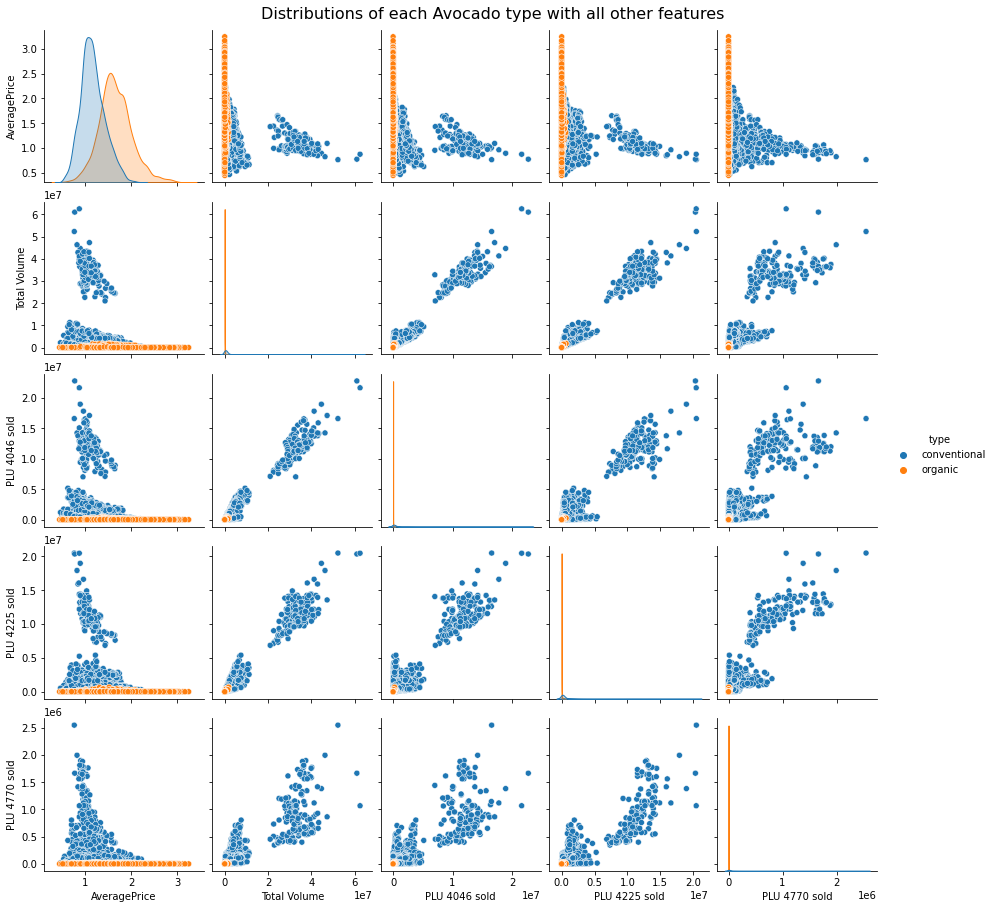

In [26]:
t= sns.pairplot(data=dataset,hue="type")
t.fig.suptitle("Distributions of each Avocado type with all other features", y=1.01, size=16)
plt.show()

By above pairplot we found the following observations
1. we have lesser number of avocados of type organic sold(PLU 4770,PLU 4225,PLU 4046)

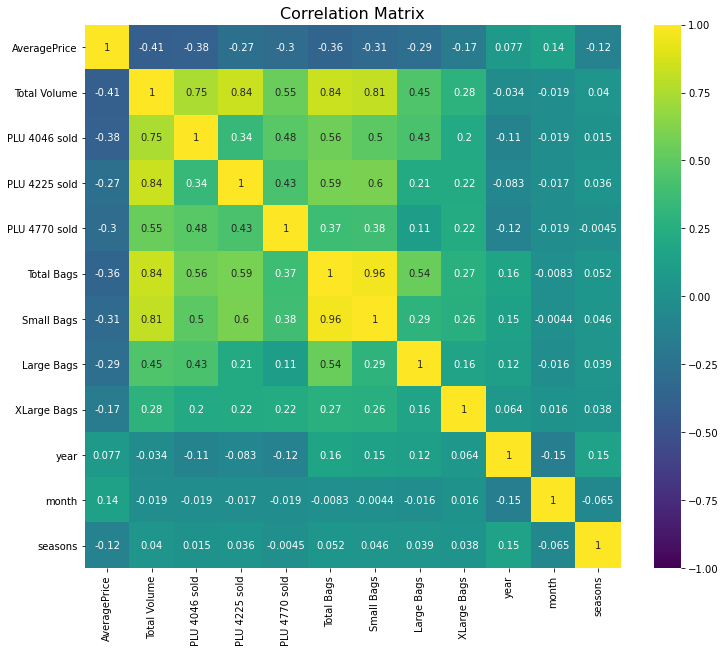

In [29]:
fx, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_title('Correlation Matrix', fontsize=16)

sns.heatmap(df_new.corr(), vmin=-1, vmax=1, cmap='viridis', annot=True)
plt.show()

#### we have relatively less number of features which are negetively correlated to the target feature. so we decide to not to drop any of the columns
1. -1 indicates a perfectly negative linear correlation between two variables
2. 0 indicates no linear correlation between two variables
3. 1 indicates a perfectly positive linear correlation between two variables

Insight on highly correlated data

1. 4225 avocados are the most preferred/sold type in the US and customers tend to buy those avocados as bulk, not bag.

2. Retailers want to increase the sales of bagged avocados instead of bulks. They think this is more advantageous for them.

3. Total Bags variable has a very high correlation with Total Volume (Total Sales) and Small Bags, so we can say that most of the bagged sales comes from the small bags.

#### Avocado Prices & Volume in the state of Boston

In [30]:
data = df_new[df_new['region']=='Boston']
data['Date']=pd.to_datetime(df_new.Date)
data=data.sort_values(by="Date")
data_org=data[data['type']=='organic'].set_index('Date')
data_con=data[data['type']=='conventional'].set_index('Date')

<ipython-input-30-64c4a0196bb8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
data_org.head()

AveragePrice  Total Volume  PLU 4046 sold  PLU 4225 sold  \
Date                                                                   
2015-01-04          1.83       2192.13           8.66         939.43   
2015-01-11          1.94       2217.82          12.82         956.07   
2015-01-18          2.00       2209.34           4.22         834.34   
2015-01-25          2.01       1948.28           3.14         760.39   
2015-02-01          1.78       2943.85          12.18        1308.94   

            PLU 4770 sold  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Date                                                                         
2015-01-04            0.0     1244.04     1244.04         0.0          0.0   
2015-01-11            0.0     1248.93     1248.93         0.0          0.0   
2015-01-18            0.0     1370.78     1370.78         0.0          0.0   
2015-01-25            0.0     1184.75     1184.75         0.0          0.0   
2015-02-01            0.0     1622.73     1622.73         0.0          0.0   

               type  year  region  month  seasons  
Date                                               
2015-01-04  organic  2015  Boston      1        3  
2015-01-11  organic  2015  Boston      1        3  
2015-01-18  organic  2015  Boston      1        3  
2015-01-25  organic  2015  Boston      1        3  
2015-02-01  organic  2015  Boston      2        3

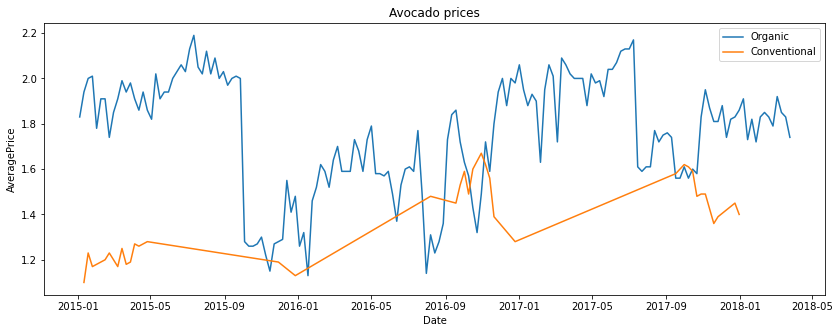

In [32]:
# Create a plot
plt.figure(figsize=(14,5))

sns.lineplot(data=data_org["AveragePrice"],label="Organic")
sns.lineplot(data=data_con["AveragePrice"],label="Conventional")

plt.xlabel("Date")
plt.title('Avocado prices')
plt.show()

###### Inferance: Above plot shows distribution of prices across Boston region along with the dates.
1. plot shows that the Organic Avocados have comparitively high Average prices than Conventional Avocados
2. At some point of time say mid of November 2016, we have both the Avocado types priced same
3. So Usually at November, December of any year both the avocado types prices are same
4. Average prices are high during the beginning of the year and it will be low during end of the year

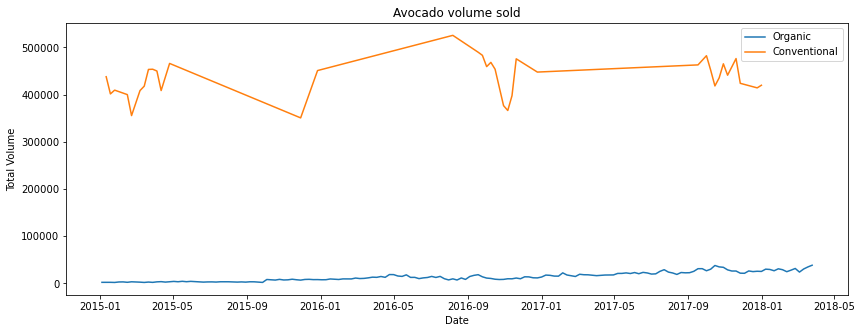

In [33]:
plt.figure(figsize=(14,5))

sns.lineplot(data=data_org["Total Volume"],label="Organic")
sns.lineplot(data=data_con["Total Volume"],label="Conventional")

plt.xlabel("Date")
plt.title("Avocado volume sold")
plt.show()

###### Volume of Avocado sold is high for conventional avocado type & less for Organic
1. This may be because of the price of the organic avocado's are high compared to Conventional avocados
2. Volume of Avocado sold fluctuates at certain months of a year
3. Market for conventional avocados will be quite high during the starting of a year ie, January

In [34]:
#finding columns
cols=df_new.columns

In [35]:
print(cols)

Index(['Date', 'AveragePrice', 'Total Volume', 'PLU 4046 sold',
       'PLU 4225 sold', 'PLU 4770 sold', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'month',
       'seasons'],
      dtype='object')


### Label Encoding

In [36]:
#Labelizing categorical variables

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
col=['type','region']
df_new[col]=df_new[col].apply(lb.fit_transform)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
# we will drop columns for better understanding
x=df_new.drop(['AveragePrice','Date'],axis=1)
y=df_new['AveragePrice']
x.head()

Total Volume  PLU 4046 sold  PLU 4225 sold  PLU 4770 sold  Total Bags  \
0      64236.62        1036.74       54454.85          48.16     8696.87   
1      54876.98         674.28       44638.81          58.33     9505.56   
2     118220.22         794.70      109149.67         130.50     8145.35   
3      78992.15        1132.00       71976.41          72.58     5811.16   
4      51039.60         941.48       43838.39          75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  month  seasons  
0     8603.62       93.25          0.0     0  2015       0     12        3  
1     9408.07       97.49          0.0     0  2015       0     12        3  
2     8042.21      103.14          0.0     0  2015       0     12        3  
3     5677.40      133.76          0.0     0  2015       0     12        3  
4     5986.26      197.69          0.0     0  2015       0     11        2

### Data Modelling

In [38]:
# importing required libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error


#### Train test split

In [39]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [40]:
models = [('lr',LinearRegression()),('ridge',Ridge()),('lasso',Lasso()),('rfr',RandomForestRegressor()),
         ('xgb',XGBRegressor()),('dtr',DecisionTreeRegressor()),('br',BaggingRegressor()),('gbr',GradientBoostingRegressor()),('en',ElasticNet())]

### Cross-validation scores

In [41]:
#function for selection of model based on cross validation scores
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i,j in model:
        cv_scores = cross_val_score(j, x, y, cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [42]:
#cross val scores for training set
basic_model_selection(x_train,y_train,2,models)

lr 0.3248234479652733
ridge 0.32495474824832893
lasso 0.1976021681827302
rfr 0.7803422228881818
xgb 0.8111124335295978
dtr 0.5516617935960804
br 0.7523903586509351
gbr 0.6857810818281771
en 0.19817622174175892


In [43]:
#cross val scores for testing set
basic_model_selection(x_test,y_test,10,models)

lr 0.34049194511587544
ridge 0.3405242229055665
lasso 0.19964946746583861
rfr 0.7518999942326567
xgb 0.7890237915302146
dtr 0.47497458583580876
br 0.7162029462056441
gbr 0.6890572062048771
en 0.19961401282857655


For K-fold=10 and n_jobs=-1 , we are getting maximum accuracy. so we will consider RandomForestRegressor and xgboostRegressor to Evaluate our model

In [44]:
#defining parameters for RandomForestRegressor & XGBoostRegressor

parameters_rfr = {
    'max_depth' : [2,3,None],
    'min_samples_split' : [2,4,6],
    'min_samples_leaf' : [1,2,4],
    'n_estimators' : [100,150,200]
                 }
parameters_xgb = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
                 }

### Hyper-parameter Tuning

In [45]:
def model_parameter_tuning(x,y,model,parameters,cross_folds):
    model_grid = GridSearchCV(model,
                        parameters,
                        n_jobs=-1,
                        cv = cross_folds,
                        verbose=True)
    model_grid.fit(x,y)
    y_predicted = model_grid.predict(x)
    print(model_grid.score)
    print(model_grid.best_params_)
    print("The RMSE score is",np.sqrt(np.mean((y-y_predicted)**2)))

In [46]:
#tuning for RandomForestRegressor
model_parameter_tuning(x_train,y_train,RandomForestRegressor(),parameters_rfr,3)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             verbose=True)>
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
The RMSE score is 0.05297981375243506


### Standardizing using Standard scaler

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized=scaler.fit_transform(x_train)
column_names = x_train.columns
df_standardized = pd.DataFrame(data=standardized,columns=column_names)
df_standardized.head()

Total Volume  PLU 4046 sold  PLU 4225 sold  PLU 4770 sold  Total Bags  \
0     -0.599322      -0.448680      -0.484502      -0.354981   -0.534885   
1     -0.655182      -0.442176      -0.489873       0.038646   -0.739162   
2     -0.639167      -0.450148      -0.482105      -0.354981   -0.664172   
3      0.293772       0.587688      -0.045448      -0.286113    0.313211   
4      1.055441       0.331221       1.182822      -0.216463    1.014670   

   Small Bags  Large Bags  XLarge Bags      type      year    region  \
0   -0.618776    0.041400    -0.212831  0.579447  0.955707 -0.457601   
1   -0.670975   -0.522182    -0.212831  0.579447 -1.154845 -1.236699   
2   -0.674218   -0.244824    -0.212831  0.579447  0.955707 -0.197902   
3    0.500765   -0.471243     3.265895 -1.725782 -0.099569  0.840895   
4    1.284348   -0.423928    -0.212831 -1.725782 -1.154845 -0.652376   

      month   seasons  
0 -0.330400 -0.544072  
1 -1.440577  1.252299  
2 -0.885489 -0.544072  
3  1.612410  1.252299  
4  1.057322  0.354114

In [48]:
#model selection based on standardised dataframe
basic_model_selection(df_standardized,y_train,10,models)

lr 0.3246059647219278
ridge 0.32470907363704143
lasso -0.001503091215118535
rfr 0.8296117808521954
xgb 0.8477395890125093
dtr 0.6430606926675547
br 0.8057478346384848
gbr 0.692497690777113
en -0.001503091215118535


###### Since XGBRegressor & RandomForestRegressor are giving high cross validation scores compared to other models,we will use both to know more details on r2_score 


### Scaling using RobustScaler & MinMaxScaler

In [49]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
robust = RobustScaler(quantile_range = (0.1,0.8)) #range of interquartile is one of the parameters
robust_stan_train = robust.fit_transform(x_train)
robust_stan_test = robust.fit_transform(x_test)
robust_stan_normalize_train= normalize.fit_transform(robust_stan_train)
robust_stan_normalize_test = normalize.fit_transform(robust_stan_test)

# also normalized the dataset using MinMaxScaler i.e has bought the data set between (0,1)

df_robust_normalize_train = pd.DataFrame(robust_stan_normalize_train,columns=column_names)
df_robust_normalize_test = pd.DataFrame(robust_stan_normalize_test,columns=column_names)
df_robust_normalize_train.head()

Total Volume  PLU 4046 sold  PLU 4225 sold  PLU 4770 sold  Total Bags  \
0      0.010695       0.000278       0.003407       0.000000    0.032323   
1      0.002954       0.001259       0.002587       0.059078    0.002045   
2      0.005173       0.000057       0.003773       0.000000    0.013160   
3      0.134460       0.156504       0.070435       0.010336    0.158028   
4      0.240012       0.117843       0.257949       0.020790    0.261999   

   Small Bags  Large Bags  XLarge Bags  type      year    region     month  \
0    0.010000    0.098304     0.000000   1.0  0.666667  0.358491  0.363636   
1    0.002304    0.000000     0.000000   1.0  0.000000  0.132075  0.000000   
2    0.001826    0.048379     0.000000   1.0  0.666667  0.433962  0.181818   
3    0.175051    0.008885     0.372719   0.0  0.333333  0.735849  1.000000   
4    0.290573    0.017138     0.000000   0.0  0.000000  0.301887  0.818182   

    seasons  
0  0.333333  
1  1.000000  
2  0.333333  
3  1.000000  
4  0.666667

In [50]:
# using normalized dataframe to predict crossvalidation scores

basic_model_selection(df_robust_normalize_train,y_train,10,models)

lr 0.3246059647218719
ridge 0.3247137738350891
lasso -0.001503091215118535
rfr 0.8307096358215007
xgb 0.847715218421181
dtr 0.6417998027551567
br 0.8022896499537173
gbr 0.6923704245481984
en -0.001503091215118535


#### Using RandomForestRegressor

In [51]:
# At first we will fit & predict the values using RandomForestRegressor model

rnd=RandomForestRegressor(max_depth=None,min_samples_leaf=1,min_samples_split=2,max_features='auto',n_estimators=150,oob_score=True,random_state=42)
rnd.fit(df_robust_normalize_train,y_train)
predict_rnd=rnd.predict(robust_stan_normalize_test)


In [52]:
# creating dataframe of original & predicted values 

prediction = list(predict_rnd)
predicted_df = {'predicted_values': prediction, 'original_values': y_test}
#creating new dataframe
df=pd.DataFrame(predicted_df)

In [53]:
# finding different metrics related to the model performance

from sklearn.metrics import r2_score
print("r2_score: ",r2_score(y_test, prediction))
print("MSE : ",mean_squared_error(y_test,prediction))
print("MAE : ",mean_absolute_error(y_test,prediction))

r2_score:  0.8346887385346272
MSE :  0.020965944183837213
MAE :  0.10454947044097826


In [54]:
model_parameter_tuning(x_train,y_train,XGBRegressor(),parameters_xgb,3)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
<bound method BaseSearchCV.score of GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
          

#### Using XGBoostRegressor

In [55]:
# Finally we will fit & predict the values using XGBRegressor model

xgb= XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.1, max_depth=10, min_child_weight= 5, n_estimators=500, objective='reg:squarederror', subsample= 0.7)
xgb.fit(df_robust_normalize_train,y_train)
predict_xgb=xgb.predict(robust_stan_normalize_test)

In [56]:
# creating dataframe of original & predicted values 

prediction1 = list(predict_xgb)
predicted_df1 = {'predicted_values': prediction, 'original_values': y_test}
#creating new dataframe
df1=pd.DataFrame(predicted_df1)

In [57]:
# finding different metrics related to the model performance

from sklearn.metrics import r2_score
print("r2_score :",r2_score(y_test, prediction1))
print("MSE : ",mean_squared_error(y_test,prediction1))
print("MAE : ",mean_absolute_error(y_test,prediction1))

r2_score : 0.8771783023337965
MSE :  0.015577116979251559
MAE :  0.09118672757187309


###### Since XGBRegressor gives comparitively better r2_score, we will consider the same model to plot the Regression plot

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



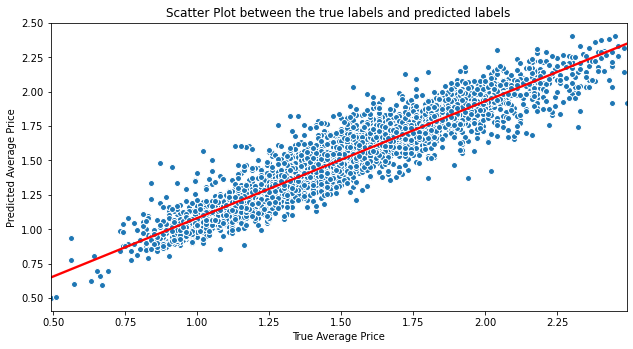

In [58]:
# plotting Regplot

fig = plt.figure(figsize = (10, 5))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
sns.scatterplot(y_test,prediction1, linewidth = 1, ax = axes)
sns.regplot(y_test,prediction1,data=df, scatter=False, color="Red")
plt.title('Scatter Plot between the true labels and predicted labels')
axes.set_xlabel("True Average Price")
axes.set_ylabel("Predicted Average Price")
plt.show()

#### Datapoints are closely related to each other suggesting the minimum error on prediction & Actual Values

In [59]:
# we will create pickel file

import pickle
filename = 'Avocado.pkl'
pickle.dump(xgb, open(filename, 'wb'))

In [60]:
# loading the pickel file for prediction & score

loaded_model = pickle.load(open('Avocado.pkl', 'rb'))
result = loaded_model.score(robust_stan_normalize_test, y_test)
print(result*100)

87.71783023337964


In [61]:
conclusion=pd.DataFrame([loaded_model.predict(robust_stan_normalize_test)[:],y_test[:]],index=["Predicted","Original"])

In [62]:
conclusion

0         1         2         3         4         5     \
Predicted  1.795034  1.015894  1.380875  1.514993  1.982453  1.386315   
Original   1.750000  1.060000  1.230000  1.530000  2.140000  1.300000   

               6         7         8         9        10        11       12    \
Predicted  2.220407  1.933566  1.201182  1.222019  2.24785  1.117185  2.02131   
Original   2.360000  2.080000  1.230000  1.360000  2.25000  1.210000  1.76000   

               13        14        15        16        17        18    \
Predicted  1.685042  1.588282  1.064084  0.894417  1.216552  1.553207   
Original   1.740000  1.590000  1.090000  0.780000  0.840000  1.440000   

               19        20        21        22        23        24    \
Predicted  1.330982  1.462652  1.576117  1.606002  1.731095  1.210912   
Original   1.260000  1.510000  1.640000  1.180000  1.870000  1.280000   

               25        26        27        28        29       30    \
Predicted  1.544971  1.190691  1.468426  1.718381  1.155106  1.38485   
Original   1.670000  1.010000  1.450000  1.750000  1.120000  1.41000   

               31        32        33        34        35        36    \
Predicted  0.941495  1.634923  1.145974  1.402879  1.642087  1.954237   
Original   0.880000  1.640000  1.040000  1.480000  1.480000  1.900000   

               37        38        39        40        41        42    \
Predicted  1.471889  1.141631  1.729472  1.194284  1.464603  1.766203   
Original   1.420000  1.140000  1.740000  1.270000  1.170000  1.870000   

              43        44        45        46        47        48    \
Predicted  1.46495  1.556118  1.335537  1.759483  1.451675  1.840971   
Original   1.41000  1.770000  1.390000  1.940000  1.400000  1.900000   

               49        50        51        52        53       54    \
Predicted  1.225249  1.171693  2.178742  1.555927  1.179659  1.05496   
Original   1.330000  1.030000  2.440000  1.630000  1.270000  1.02000   

               55        56        57        58        59        60    \
Predicted  1.479774  1.100978  1.200945  1.500047  1.345367  1.363175   
Original   1.320000  1.090000  1.170000  1.660000  1.410000  1.440000   

               61        62        63        64        65        66    \
Predicted  1.781412  1.657473  1.600352  1.257727  1.997188  1.233413   
Original   1.810000  1.540000  1.660000  1.180000  2.310000  1.300000   

               67        68        69       70        71        72    \
Predicted  0.988332  1.403606  1.884758  0.99573  1.749217  1.035498   
Original   0.900000  1.400000  2.100000  0.82000  1.990000  1.030000   

               73       74       75        76        77        78        79    \
Predicted  1.546813  1.30729  1.83907  1.761969  1.392319  1.191852  1.043051   
Original   1.440000  1.21000  1.91000  1.890000  1.360000  1.240000  1.100000   

               80        81        82      83       84        85        86    \
Predicted  1.624494  1.728259  1.574017  1.7818  1.75383  1.343763  1.126848   
Original   1.630000  1.750000  1.480000  1.6100  1.74000  1.270000  1.160000   

               87        88        89        90        91        92    \
Predicted  1.587199  1.992991  1.362482  1.165175  0.875318  1.395261   
Original   1.570000  1.930000  1.360000  1.170000  0.820000  1.460000   

              93        94        95        96        97        98    \
Predicted  1.09849  1.694102  1.478306  2.083635  1.679033  1.420498   
Original   1.24000  1.500000  1.480000  2.360000  1.860000  1.290000   

               99        100     101       102      103       104       105   \
Predicted  1.352063  1.457931  1.7102  1.649942  1.32517  1.482473  1.636675   
Original   1.340000  1.420000  1.6600  1.700000  1.18000  1.420000  1.530000   

               106       107      108       109       110       111   \
Predicted  1.595861  1.371967  1.54874  1.703033  1.609563  1.469512   
Original   1.170000  1.360000  1.49000  1.620000  1.7800

#### We have got almost 0.01 precision errors if we take an average of the errors in the predicted & actual values. 
So thats pretty good score which we have achieved. we can still fine tune the model based on the hyper parameter tuning with best parameters & using best random state. since the model changes score sometimes we dont get the exactly the same score when we run second time. still, we believe its the better accuracy score